# Sierraleone EDA Notebook Template
# File: notebooks/sierraleone_eda.ipynb
# -----------------------------------------------
# Step 1: Import libraries
# -----------------------------------------------

In [1]:
import sys
print(f"Python executable path: {sys.executable}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  
import matplotlib
import scipy
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"SciPy version: {scipy.__version__}")


Python executable path: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Scripts\python.exe
Pandas version: 2.3.3
Numpy version: 2.3.4
Matplotlib version: 3.10.7
Seaborn version: 0.13.2
SciPy version: 1.16.3


# Optional: Inline plotting for Jupyter

In [2]:
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# ----------------------------------
# Step 2: Load dataset
# ----------------------------------

In [3]:
file_path = "../data/sierraleone-bumbuna.csv"  # your dataset path

try:
    df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
    print(f"Step 2: CSV loaded successfully. Shape: {df.shape} ✅")
    print("First 5 rows of the dataset:")
    display(df.head())
except Exception as e:
    print(f"Step 2: Failed to load CSV. Error: {e}")


Step 2: CSV loaded successfully. Shape: (525600, 18) ✅
First 5 rows of the dataset:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# ----------------------------------------------------------
# Step 3: Summary Statistics & Missing Values Report
# ----------------------------------------------------------

In [4]:
try:
    # Summary statistics for numeric columns
    numeric_summary = df.describe()
    print("Step 3a: Summary statistics for numeric columns computed ✅")
    display(numeric_summary)

    # Count missing values per column
    missing_counts = df.isna().sum()
    print("Step 3b: Missing values per column computed ✅")
    display(missing_counts)

    # Columns with >5% missing values
    missing_percent = (missing_counts / len(df)) * 100
    cols_over_5pct = missing_percent[missing_percent > 5].index.tolist()
    print(f"Step 3c: Columns with >5% missing values: {cols_over_5pct} ✅")

except Exception as e:
    print(f"Step 3: Failed. Error: {e}")


Step 3a: Summary statistics for numeric columns computed ✅


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Step 3b: Missing values per column computed ✅


GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Step 3c: Columns with >5% missing values: ['Comments'] ✅


# ---------------------------------------------------
# Step 4 is Outlier Detection & Basic Cleaning
# ---------------------------------------------------

# 4a: Columns where negative values are not possible

In [5]:
cols_no_neg = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("Step 4a: Columns where negative values are not possible identified ✅")

Step 4a: Columns where negative values are not possible identified ✅


# 4b: Replace negative values with NaN

In [6]:
for col in cols_no_neg:
    negative_count = (df[col] < 0).sum()
    df.loc[df[col] < 0, col] = np.nan
    print(f"{col}: {negative_count} negative values set to NaN ✅")

GHI: 261135 negative values set to NaN ✅
DNI: 266352 negative values set to NaN ✅
DHI: 263128 negative values set to NaN ✅
ModA: 0 negative values set to NaN ✅
ModB: 0 negative values set to NaN ✅
WS: 0 negative values set to NaN ✅
WSgust: 0 negative values set to NaN ✅


# 4c: Outlier detection using Z-score

In [7]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outlier_rows = (z_scores > 3).any(axis=1).sum()

print(f"Step 4: Outlier detection completed. Rows with Z>3: {outlier_rows} ✅")

Step 4: Outlier detection completed. Rows with Z>3: 6943 ✅


# -------------------------------------------------
# Step 5: Impute missing numeric values with median
# --------------------------------------------------

In [8]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude 'Comments' if it's numeric (it has 100% NaN)
numeric_cols = [col for col in numeric_cols if col != 'Comments']

for col in numeric_cols:
    missing_before = df[col].isna().sum()
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    missing_after = df[col].isna().sum()
    print(f"{col}: {missing_before} missing values filled with median ({median_val}) ✅ Remaining missing: {missing_after}")

# Check remaining missing values in numeric columns
remaining_missing = df[numeric_cols].isna().sum().sum()
print(f"Step 5: Missing numeric values imputed. Total remaining missing: {remaining_missing} ✅")


GHI: 261135 missing values filled with median (359.5) ✅ Remaining missing: 0
DNI: 266352 missing values filled with median (115.3) ✅ Remaining missing: 0
DHI: 263128 missing values filled with median (225.0) ✅ Remaining missing: 0
ModA: 0 missing values filled with median (3.6) ✅ Remaining missing: 0
ModB: 0 missing values filled with median (3.4) ✅ Remaining missing: 0
Tamb: 0 missing values filled with median (25.3) ✅ Remaining missing: 0
RH: 0 missing values filled with median (85.4) ✅ Remaining missing: 0
WS: 0 missing values filled with median (0.8) ✅ Remaining missing: 0
WSgust: 0 missing values filled with median (1.6) ✅ Remaining missing: 0
WSstdev: 0 missing values filled with median (0.4) ✅ Remaining missing: 0
WD: 0 missing values filled with median (161.5) ✅ Remaining missing: 0
WDstdev: 0 missing values filled with median (6.2) ✅ Remaining missing: 0
BP: 0 missing values filled with median (1000.0) ✅ Remaining missing: 0
Cleaning: 0 missing values filled with median (0.0) 

# -----------------------------------------------
# Step 6: Cleaning impact on ModA & ModB
# -----------------------------------------------

Average ModA & ModB by Cleaning flag:
                 ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102 ✅


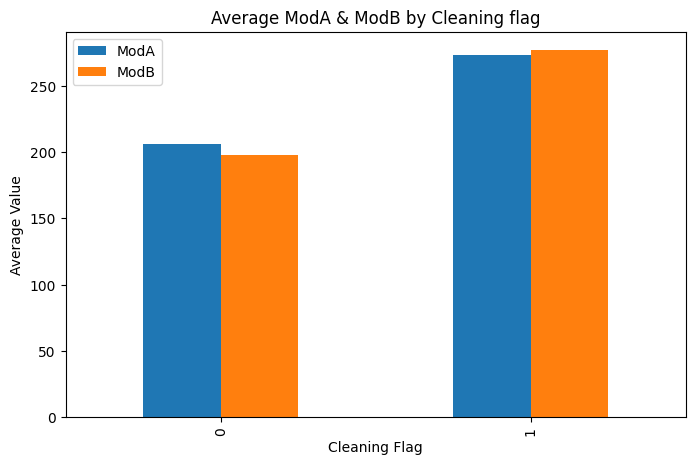

Step 6: Cleaning impact visualization completed ✅


In [9]:

# Group by 'Cleaning' flag
cleaning_group = df.groupby('Cleaning')[['ModA','ModB']].mean()
print("Average ModA & ModB by Cleaning flag:\n", cleaning_group, "✅")

# Plot average ModA & ModB by Cleaning flag
cleaning_group.plot(kind='bar', figsize=(8,5))
plt.title("Average ModA & ModB by Cleaning flag")
plt.ylabel("Average Value")
plt.xlabel("Cleaning Flag")
plt.show()
print("Step 6: Cleaning impact visualization completed ✅")


# --------------------------------
# Step 7: Time Series Analysis
# --------------------------------

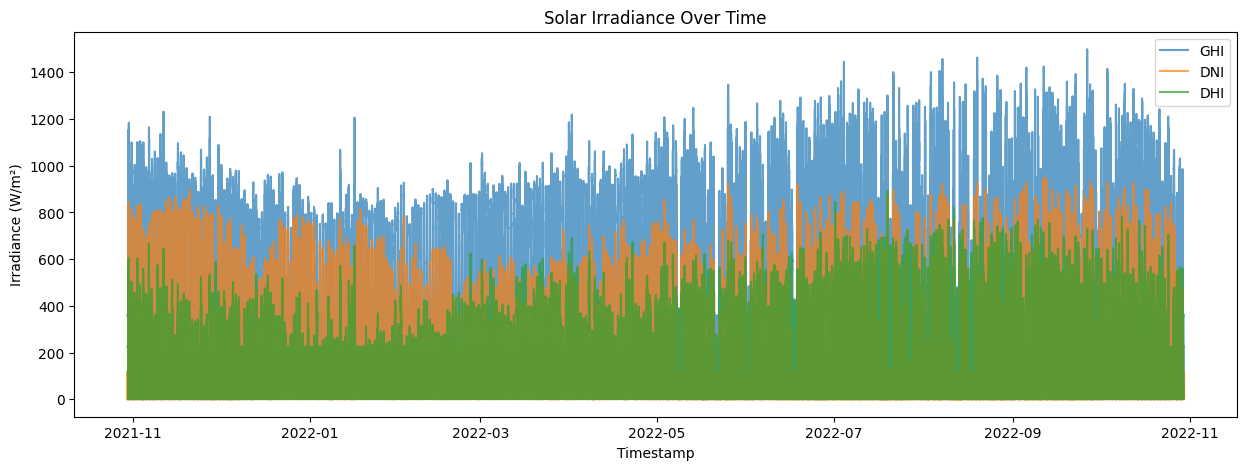

Step 7a: Solar irradiance time series plotted ✅


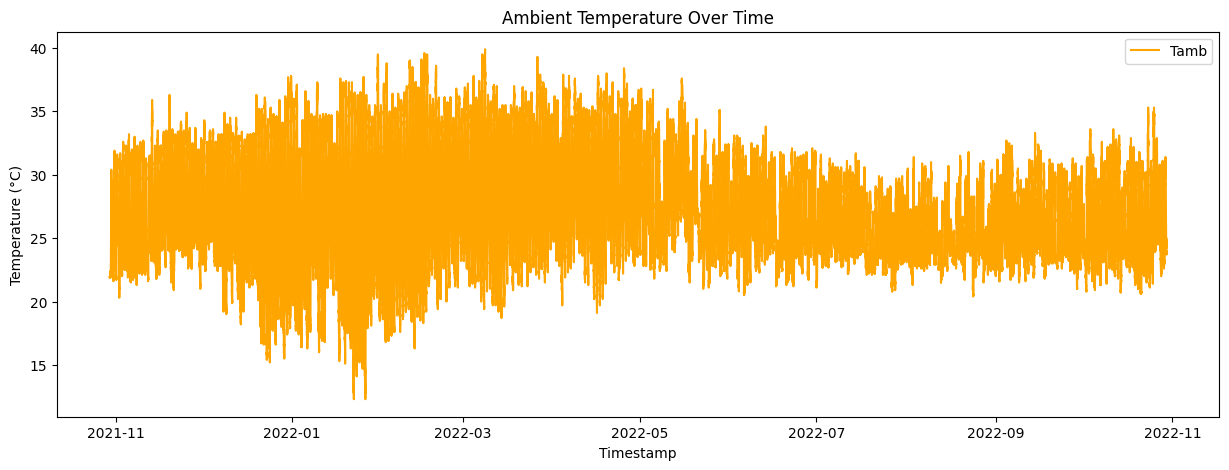

Step 7b: Temperature time series plotted ✅


In [10]:
# Step 7: Time Series Analysis
plt.figure(figsize=(15,5))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.show()
print("Step 7a: Solar irradiance time series plotted ✅")

plt.figure(figsize=(15,5))
plt.plot(df.index, df['Tamb'], color='orange', label='Tamb')
plt.title("Ambient Temperature Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()
print("Step 7b: Temperature time series plotted ✅")


# Step 7 alternative: Numerical summary for time series patterns

In [11]:
# Daily averages
daily_avg = df.resample('D').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 7a: Daily averages (first 5 days):")
print(daily_avg.head())
print("✅")

# Monthly averages
monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]
print("\nStep 7b: Monthly averages:")
print(monthly_avg)
print("✅")

# Daily min/max to check anomalies
daily_min_max = df.resample('D').agg({'GHI':['min','max'], 'DNI':['min','max'], 'DHI':['min','max'], 'Tamb':['min','max']})
print("\nStep 7c: Daily min/max (first 5 days):")
print(daily_min_max.head())
print("✅")


Step 7a: Daily averages (first 5 days):
                   GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-30  379.816400  146.848784  238.801459  24.696664
2021-10-31  420.178472  256.610486  214.644792  25.060486
2021-11-01  402.086875  185.945486  232.510347  25.764444
2021-11-02  385.946736  205.859653  215.994375  25.512917
2021-11-03  424.282292  243.726736  220.555417  26.172222
✅

Step 7b: Monthly averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-31  400.004446  201.748697  226.718930  24.878638
2021-11-30  400.557051  231.478556  210.347780  26.488898
2021-12-31  386.780428  214.659662  211.187713  25.878651
2022-01-31  394.074207  231.001888  203.948215  25.329689
2022-02-28  413.138750  207.740546  231.183430  27.185801
2022-03-31  419.127711  190.482704  246.248414  28.359635
2022-04-30  419.757264  203.983880  233.733250  28.747725
20

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34224\348967152.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]


# -----------------------------------------------
# Step 8: Correlation & Relationship Analysis
# -----------------------------------------------

Step 8a: Correlation matrix computed ✅

             GHI       DNI       DHI      ModA      ModB      Tamb        RH  \
GHI     1.000000  0.770164  0.718653  0.793670  0.793867  0.409312 -0.390534   
DNI     0.770164  1.000000  0.198058  0.786426  0.785031  0.492667 -0.496298   
DHI     0.718653  0.198058  1.000000  0.531899  0.533766  0.240880 -0.179840   
ModA    0.793670  0.786426  0.531899  1.000000  0.999127  0.637249 -0.564704   
ModB    0.793867  0.785031  0.533766  0.999127  1.000000  0.633820 -0.557814   
Tamb    0.409312  0.492667  0.240880  0.637249  0.633820  1.000000 -0.791937   
RH     -0.390534 -0.496298 -0.179840 -0.564704 -0.557814 -0.791937  1.000000   
WS      0.231981  0.269182  0.161495  0.366454  0.364795  0.539170 -0.471197   
WSgust  0.261350  0.295154  0.186366  0.406698  0.404979  0.557139 -0.483660   
BP     -0.040315 -0.201330  0.107786 -0.144652 -0.139502 -0.511430  0.571448   
TModA   0.676156  0.713196  0.444657  0.928274  0.926682  0.831892 -0.688057   


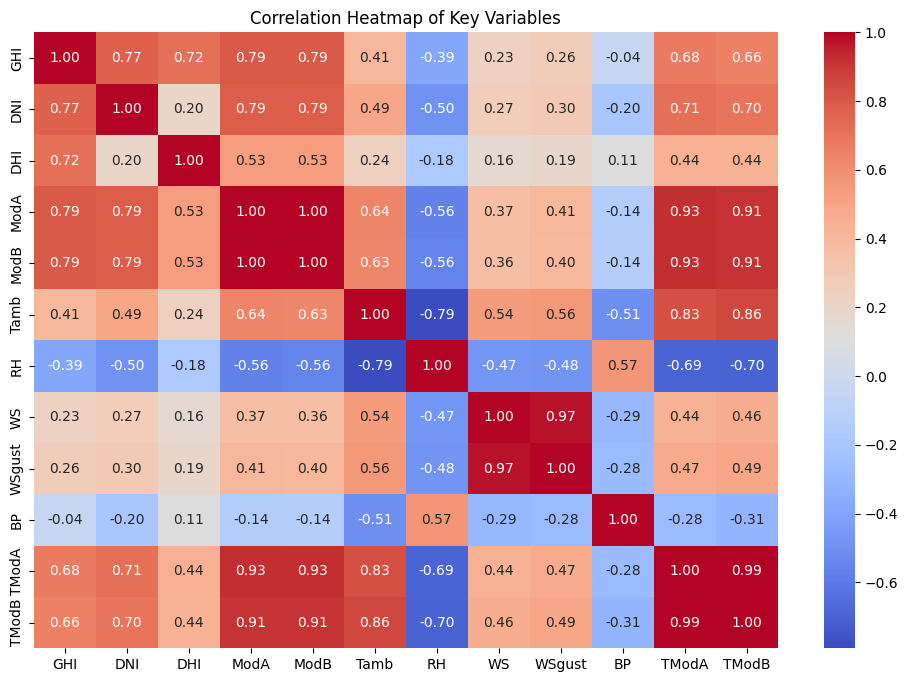

Step 8b: Correlation heatmap displayed ✅

Step 8c: Top correlated pairs (absolute correlation):
 ModA    ModB      0.999127
ModB    ModA      0.999127
TModA   TModB     0.993228
TModB   TModA     0.993228
WS      WSgust    0.973939
WSgust  WS        0.973939
ModA    TModA     0.928274
TModA   ModA      0.928274
        ModB      0.926682
ModB    TModA     0.926682
dtype: float64 

Step 8: Correlation analysis completed ✅


In [12]:
# Select relevant numeric columns for correlation
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

print("Step 8a: Correlation matrix computed ✅\n")
print(corr_matrix, "\n")

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Key Variables")
plt.show()
print("Step 8b: Correlation heatmap displayed ✅\n")

# Optional: Top correlations (absolute, excluding self-correlation)
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1].sort_values(key=abs, ascending=False)
print("Step 8c: Top correlated pairs (absolute correlation):\n", corr_pairs.head(10), "\n")
print("Step 8: Correlation analysis completed ✅")


# -----------------------------------------------
# Step 9: Time Series Visualization & Trends
# -----------------------------------------------

Step 9a: Daily averages (first 5 days):
                    GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-30  379.816400  146.848784  238.801459  24.696664
2021-10-31  420.178472  256.610486  214.644792  25.060486
2021-11-01  402.086875  185.945486  232.510347  25.764444
2021-11-02  385.946736  205.859653  215.994375  25.512917
2021-11-03  424.282292  243.726736  220.555417  26.172222 ✅

Step 9a: Monthly averages:
                    GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-31  400.004446  201.748697  226.718930  24.878638
2021-11-30  400.557051  231.478556  210.347780  26.488898
2021-12-31  386.780428  214.659662  211.187713  25.878651
2022-01-31  394.074207  231.001888  203.948215  25.329689
2022-02-28  413.138750  207.740546  231.183430  27.185801 ✅



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34224\3122724169.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]


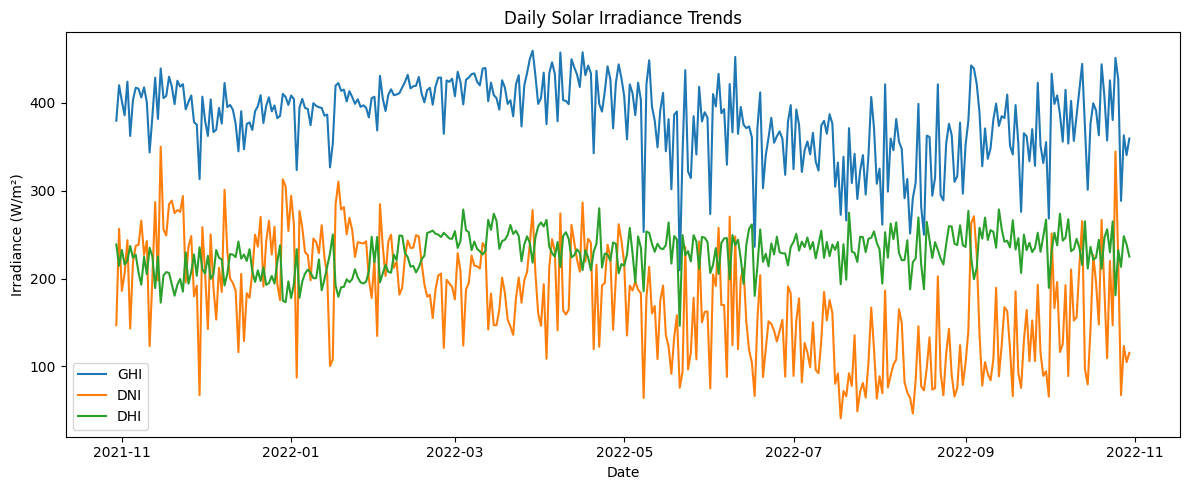

Step 9b: Daily min/max (first 5 days):
             GHI_min  DNI_min  DHI_min  Tamb_min  GHI_max  DNI_max  DHI_max  \
Timestamp                                                                    
2021-10-30      0.0      0.0      0.1      21.9   1184.0    844.0    605.9   
2021-10-31      0.0      0.0      0.0      21.6   1100.0    810.0    502.7   
2021-11-01      0.0      0.0      0.0      21.7   1004.0    776.3    457.2   
2021-11-02      0.0      0.0      0.1      20.3   1102.0    828.0    602.7   
2021-11-03      0.1      0.0      0.0      22.0   1106.0    835.0    492.1   

            Tamb_max  
Timestamp             
2021-10-30      30.4  
2021-10-31      31.9  
2021-11-01      31.6  
2021-11-02      31.7  
2021-11-03      32.6   ✅



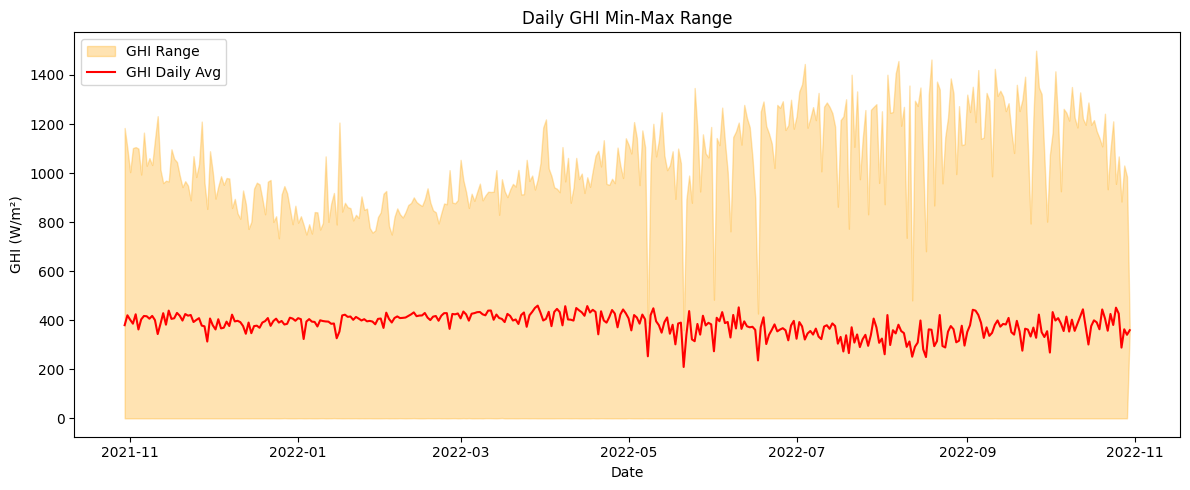

In [13]:
df.index = pd.to_datetime(df.index)

# -----------------------------
# Step 9a: Daily Averages
# -----------------------------
daily_avg = df.resample('D').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 9a: Daily averages (first 5 days):\n", daily_avg.head(), "✅\n")

# Step 9a: Monthly Averages
monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 9a: Monthly averages:\n", monthly_avg.head(), "✅\n")

# Optional: Plot daily trends
plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['GHI'], label='GHI')
plt.plot(daily_avg.index, daily_avg['DNI'], label='DNI')
plt.plot(daily_avg.index, daily_avg['DHI'], label='DHI')
plt.title('Daily Solar Irradiance Trends')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Step 9b: Daily Min/Max
# -----------------------------
daily_min = df.resample('D').min()[['GHI','DNI','DHI','Tamb']]
daily_max = df.resample('D').max()[['GHI','DNI','DHI','Tamb']]
daily_minmax = pd.concat([daily_min.add_suffix('_min'), daily_max.add_suffix('_max')], axis=1)
print("Step 9b: Daily min/max (first 5 days):\n", daily_minmax.head(), "✅\n")

# Optional: Plot daily min/max ranges for GHI
plt.figure(figsize=(12,5))
plt.fill_between(daily_minmax.index, daily_minmax['GHI_min'], daily_minmax['GHI_max'], color='orange', alpha=0.3, label='GHI Range')
plt.plot(daily_avg.index, daily_avg['GHI'], color='red', label='GHI Daily Avg')
plt.title('Daily GHI Min-Max Range')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.tight_layout()
plt.show()



# -----------------------------------------------
# Step 10: Feature engineering
# -----------------------------------------------

In [14]:

# Make sure Timestamp is a datetime index
df.index = pd.to_datetime(df.index)

# 1. Time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # Monday=0, Sunday=6
df['Month'] = df.index.month

# 2. Optional: Previous hour GHI (lag feature)
df['GHI_lag1'] = df['GHI'].shift(1)
df['DNI_lag1'] = df['DNI'].shift(1)
df['DHI_lag1'] = df['DHI'].shift(1)

# 3. Optional: 3-hour rolling average
df['GHI_roll3'] = df['GHI'].rolling(window=3).mean()
df['Tamb_roll3'] = df['Tamb'].rolling(window=3).mean()

print("Step 10: Feature engineering completed ✅")
print("New columns added:", df.columns[-8:].tolist())  # Show only the new columns


Step 10: Feature engineering completed ✅
New columns added: ['Hour', 'DayOfWeek', 'Month', 'GHI_lag1', 'DNI_lag1', 'DHI_lag1', 'GHI_roll3', 'Tamb_roll3']


# -----------------------------------------------
# Step 11: data visualization of the new features
# -----------------------------------------------

<Figure size 1400x600 with 0 Axes>

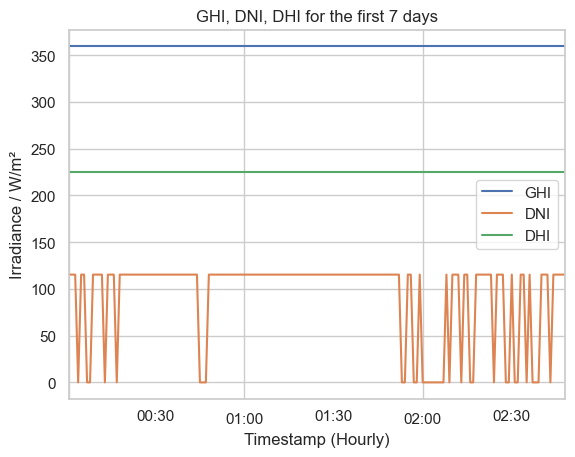

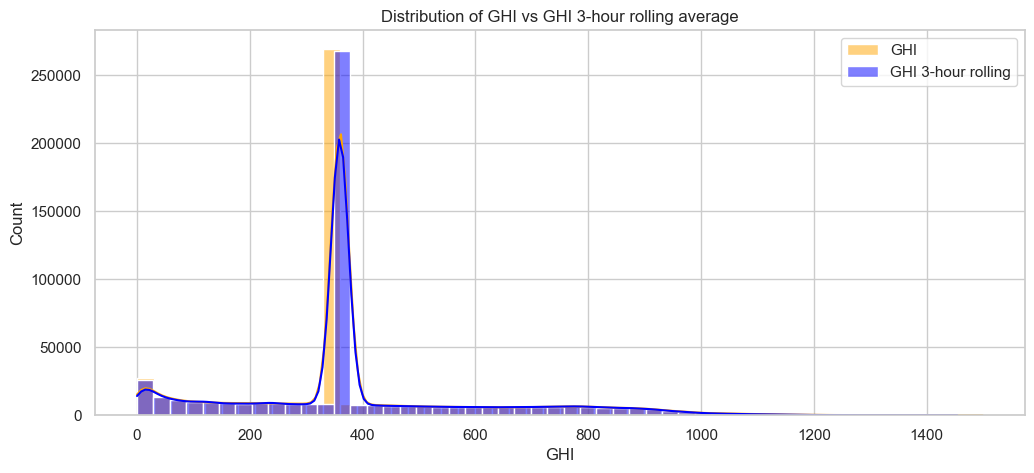

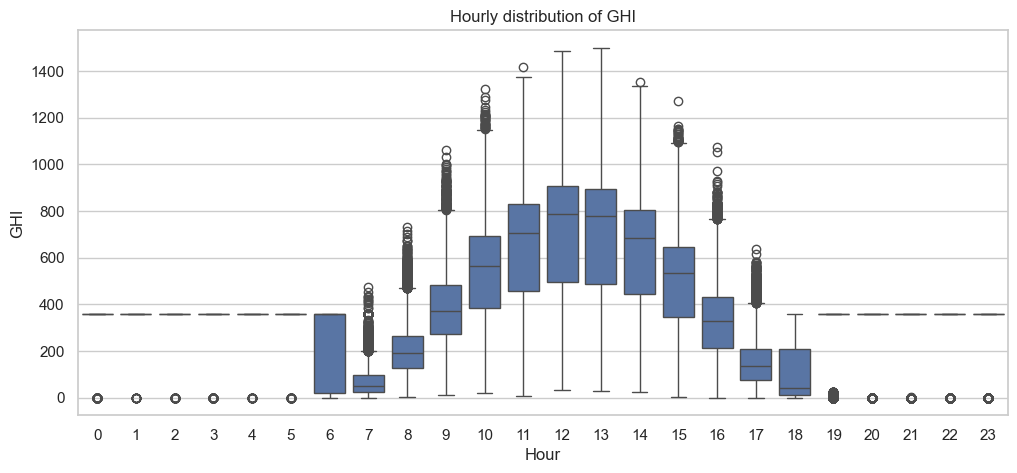

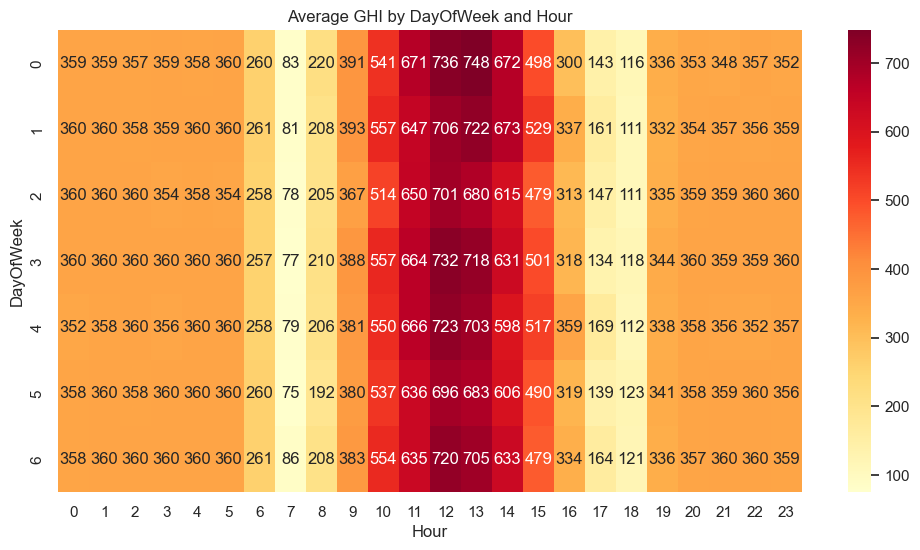

In [15]:
# Set plotting style
sns.set(style="whitegrid")

# Step 11a: Visualize GHI, DNI, DHI over time (first 7 days)
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI']].iloc[:7*24].plot()
plt.title('GHI, DNI, DHI for the first 7 days')
plt.xlabel('Timestamp (Hourly)')
plt.ylabel('Irradiance / W/m²')
plt.legend()
plt.show()

# Step 11b: Distribution of GHI and rolling average
plt.figure(figsize=(12, 5))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange', label='GHI')
sns.histplot(df['GHI_roll3'], bins=50, kde=True, color='blue', label='GHI 3-hour rolling')
plt.title('Distribution of GHI vs GHI 3-hour rolling average')
plt.legend()
plt.show()

# Step 11c: Boxplot of GHI by Hour of the Day
plt.figure(figsize=(12, 5))
sns.boxplot(x='Hour', y='GHI', data=df)
plt.title('Hourly distribution of GHI')
plt.show()

# Step 11d: Heatmap of average GHI by DayOfWeek and Hour
pivot = df.pivot_table(index='DayOfWeek', columns='Hour', values='GHI', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Average GHI by DayOfWeek and Hour')
plt.show()


# -----------------------------------------------
# Step 12: Advanced EDA & Visualizations
# -----------------------------------------------

# 12a. Time Series Trends

<Figure size 1500x600 with 0 Axes>

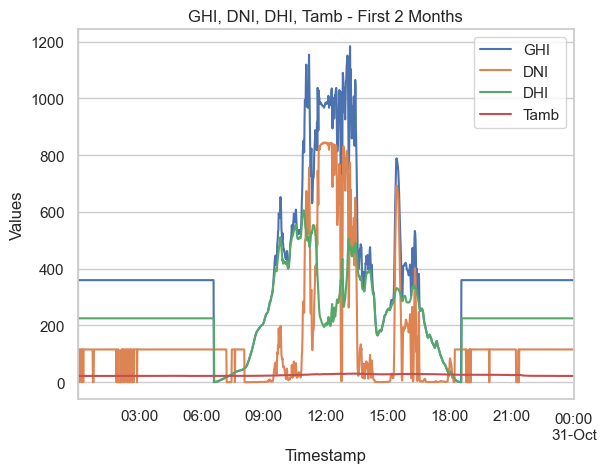

Step 12a: Time Series Trends ✅


In [16]:
# Plot GHI, DNI, DHI, Tamb over the full dataset (first 2 months for clarity)
plt.figure(figsize=(15,6))
df[['GHI','DNI','DHI','Tamb']].iloc[:60*24].plot()
plt.title('GHI, DNI, DHI, Tamb - First 2 Months')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()
print("Step 12a: Time Series Trends ✅")

# 12b. Cleaning Impact on ModA & ModB

Average ModA & ModB by Cleaning flag:
                 ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


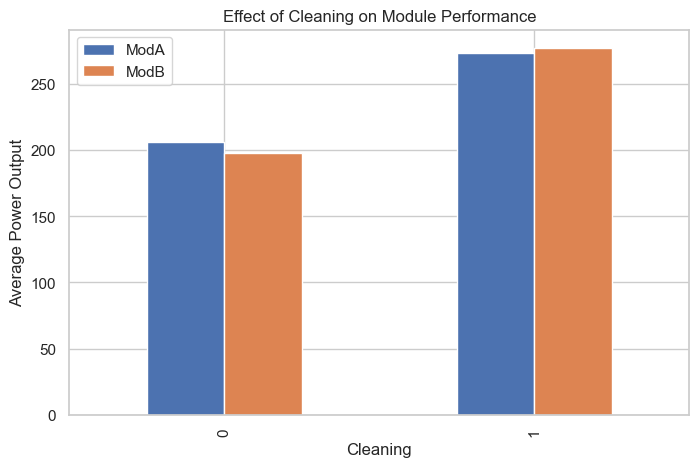

Step 12b: Cleaning Impact on ModA & ModB visualized ✅


In [17]:
# Average ModA & ModB pre/post-cleaning
avg_cleaning = df.groupby('Cleaning')[['ModA','ModB']].mean()
print("Average ModA & ModB by Cleaning flag:\n", avg_cleaning)

# Visualization
avg_cleaning.plot(kind='bar', figsize=(8,5))
plt.title('Effect of Cleaning on Module Performance')
plt.ylabel('Average Power Output')
plt.show()
print("Step 12b: Cleaning Impact on ModA & ModB visualized ✅")

# 12c. Correlation Heatmap (Feature Relationships)

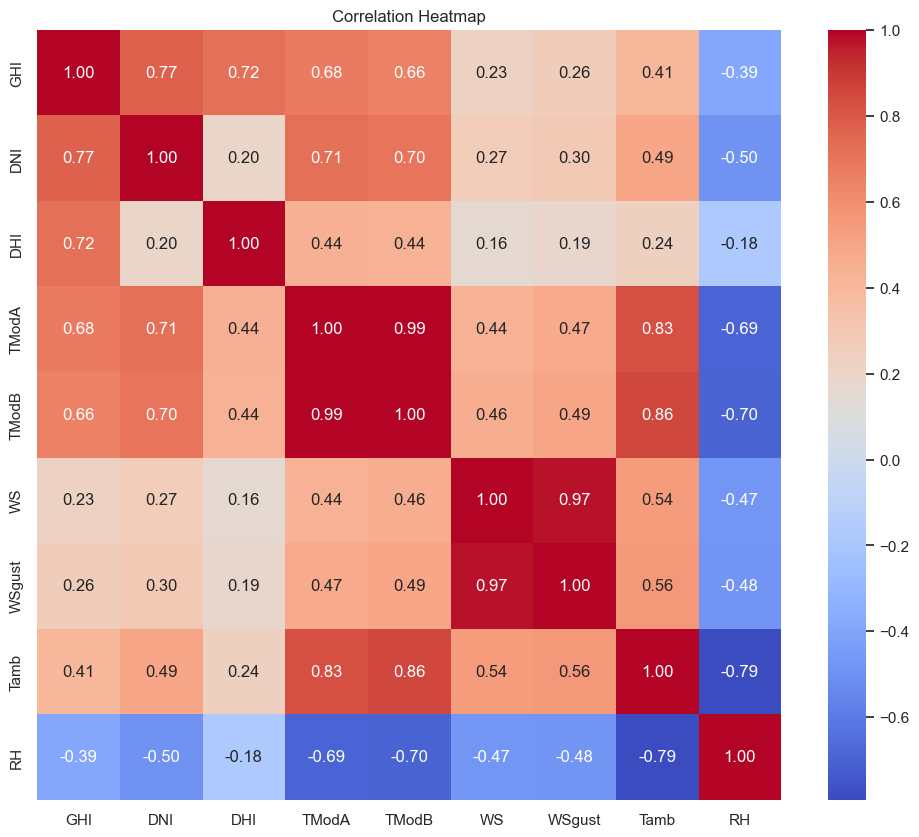

Step 12c: Correlation Heatmap displayed ✅


In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['GHI','DNI','DHI','TModA','TModB','WS','WSgust','Tamb','RH']].corr(), 
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("Step 12c: Correlation Heatmap displayed ✅")

# 12d. Scatter Plots for Key Relationships

c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


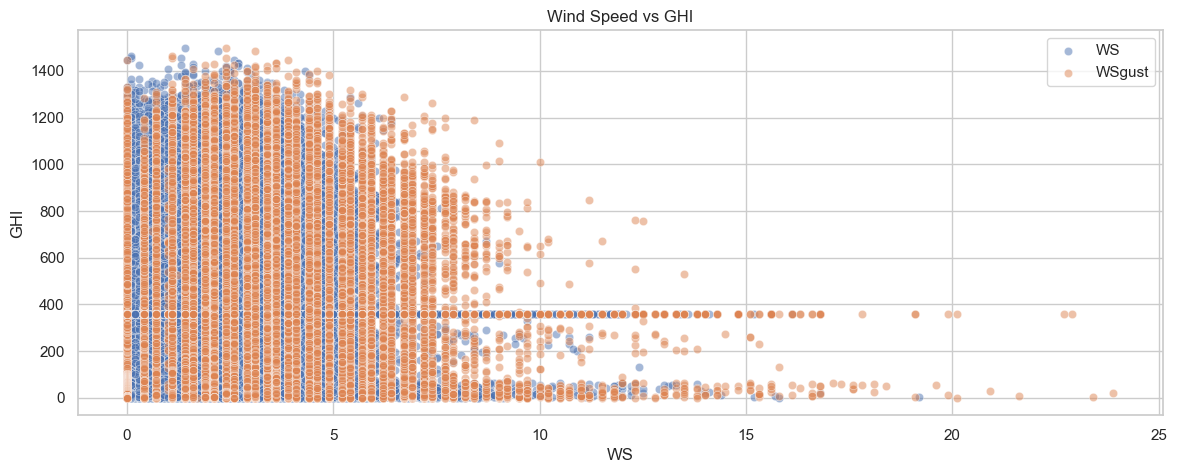

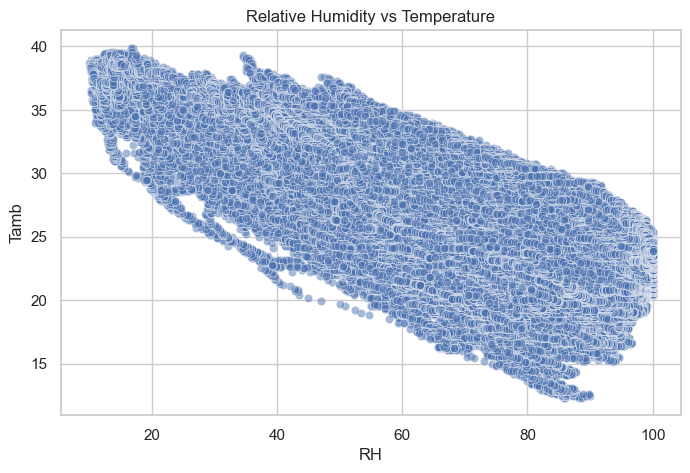

Step 12d: Scatter Plots for Key Relationships displayed ✅


In [19]:
# Scatter: WS & WSgust vs GHI
plt.figure(figsize=(14,5))
sns.scatterplot(x='WS', y='GHI', data=df, alpha=0.5, label='WS')
sns.scatterplot(x='WSgust', y='GHI', data=df, alpha=0.5, label='WSgust')
plt.title('Wind Speed vs GHI')
plt.legend()
plt.show()

# Scatter: RH vs Tamb
plt.figure(figsize=(8,5))
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title('Relative Humidity vs Temperature')
plt.show()
print("Step 12d: Scatter Plots for Key Relationships displayed ✅")

# 12e. Wind & Distribution Analysis

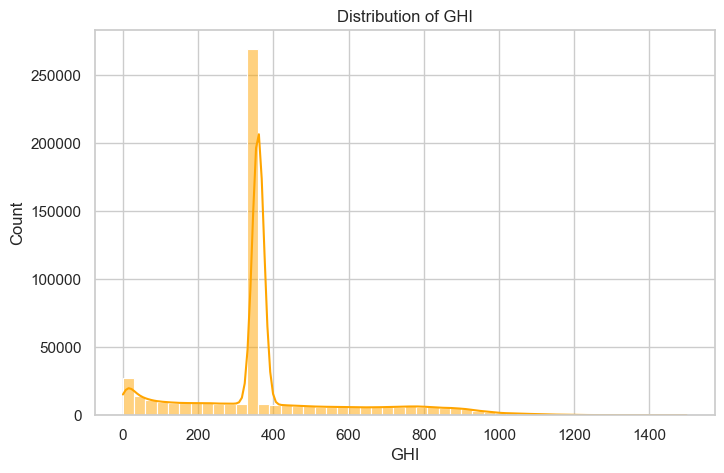

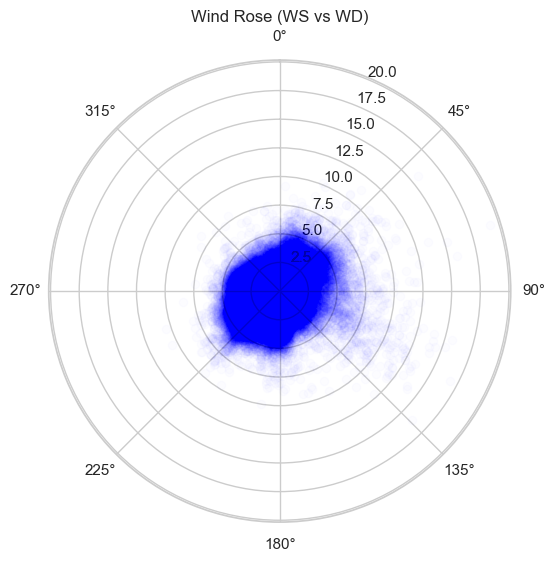

Step 12e: Wind & Distribution Analysis displayed ✅


In [20]:
# Histogram of GHI
plt.figure(figsize=(8,5))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of GHI')
plt.show()

# Wind rose approximation using polar plot (WS vs WD)
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
theta = np.deg2rad(df['WD'])
r = df['WS']
ax.scatter(theta, r, alpha=0.01, color='blue')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose (WS vs WD)')
plt.show()
print("Step 12e: Wind & Distribution Analysis displayed ✅")

# 12f. Temperature & RH Bubble Chart

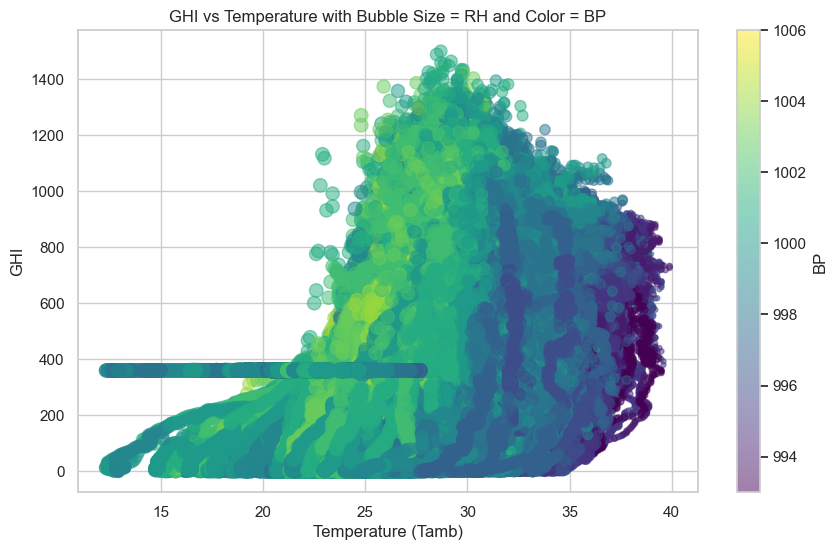

Step 12f: Temperature & RH Bubble Chart displayed ✅


In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], c=df['BP'], alpha=0.5, cmap='viridis')
plt.colorbar(label='BP')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Temperature with Bubble Size = RH and Color = BP')
plt.show()
print("Step 12f: Temperature & RH Bubble Chart displayed ✅")

# -----------------------------------------------
# Step 13: Advanced Wind Analysis
# -----------------------------------------------

# 13a. Proper Wind Rose using directional bins

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34224\661638069.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rose = df.groupby('WD_bin')['WS'].mean()


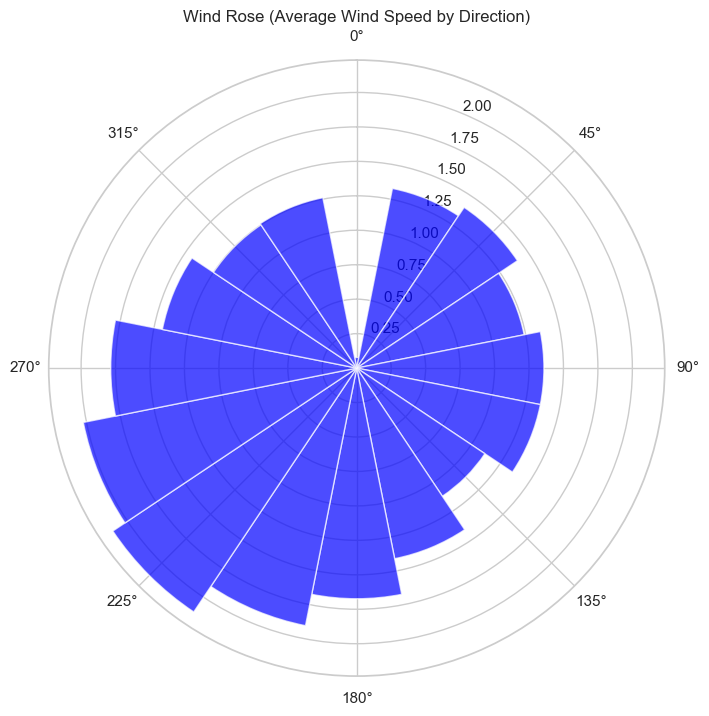

Step 13a: Proper Wind Rose displayed ✅


In [22]:
# Create wind direction bins (16 compass directions)
bins = np.arange(0, 360 + 22.5, 22.5)  # 16 bins
df['WD_bin'] = pd.cut(df['WD'], bins, include_lowest=True, labels=bins[:-1])

wind_rose = df.groupby('WD_bin')['WS'].mean()
theta = np.deg2rad([float(x) for x in wind_rose.index])

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, wind_rose.values, width=np.deg2rad(22.5), bottom=0.0, alpha=0.7, color='blue')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose (Average Wind Speed by Direction)')
plt.show()
print("Step 13a: Proper Wind Rose displayed ✅")

# 13b. Scatter Plot: WD vs GHI

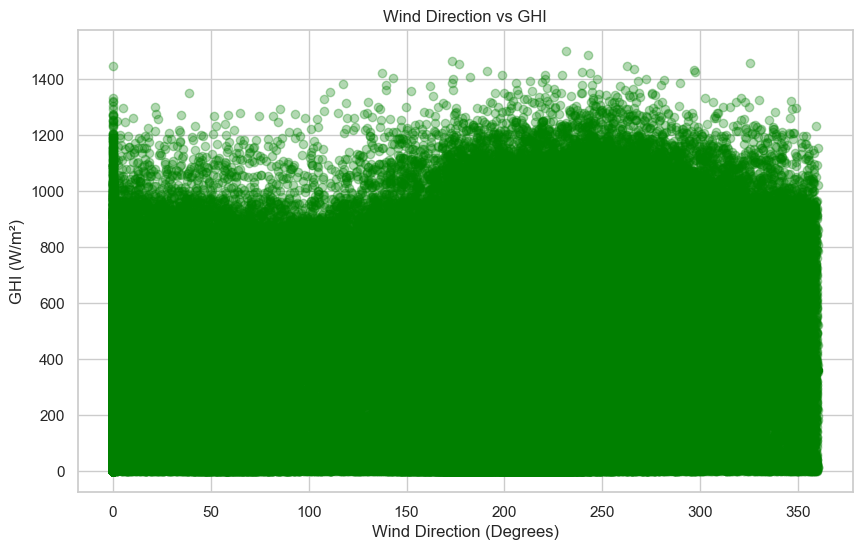

Step 13b: WD vs GHI scatter plot displayed ✅


In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['WD'], df['GHI'], alpha=0.3, color='green')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Direction vs GHI')
plt.show()
print("Step 13b: WD vs GHI scatter plot displayed ✅")

# -----------------------------------------------
# Step 14: Statistical Distributions
# -----------------------------------------------

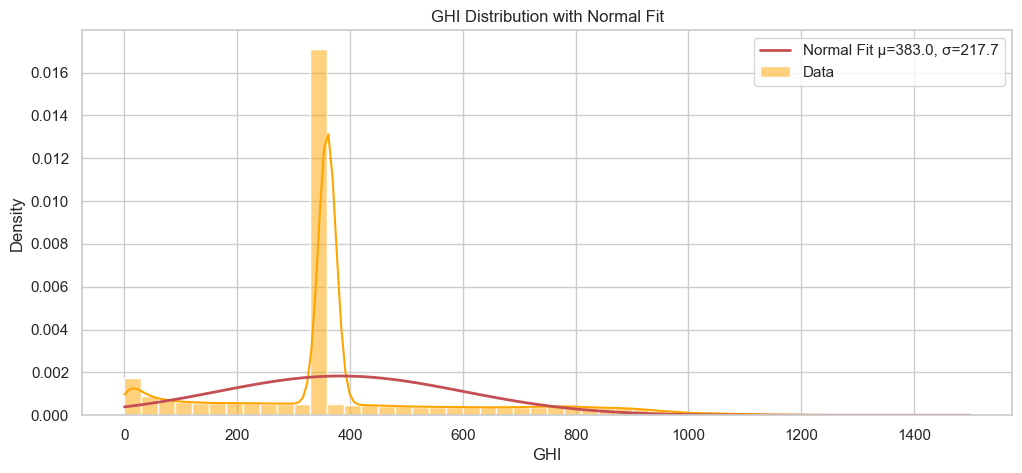

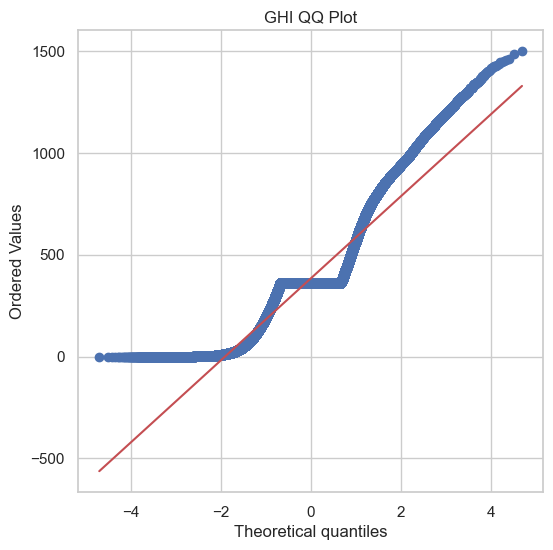

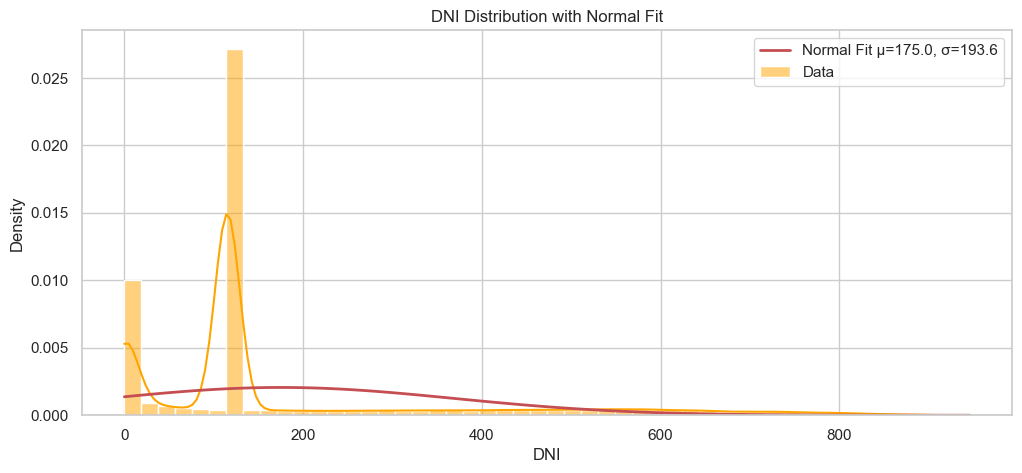

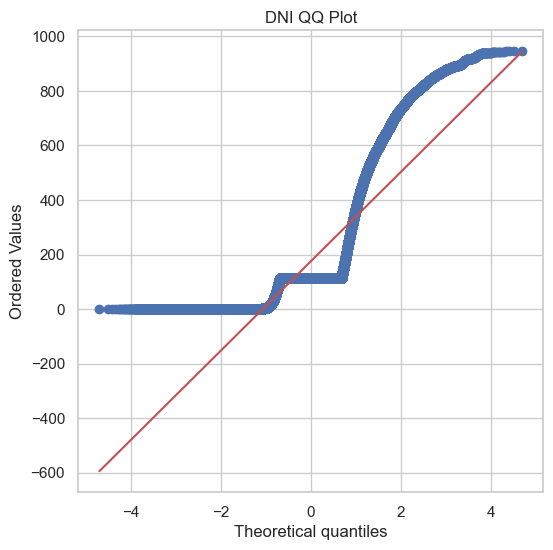

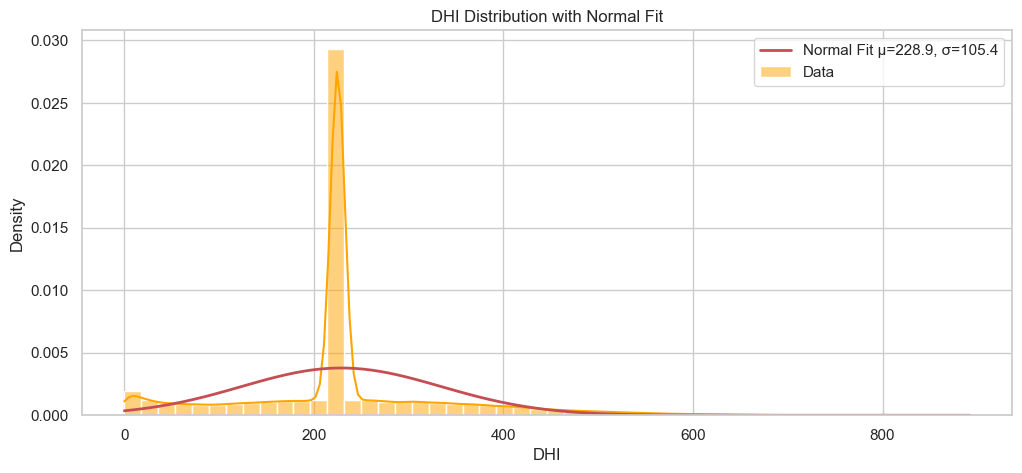

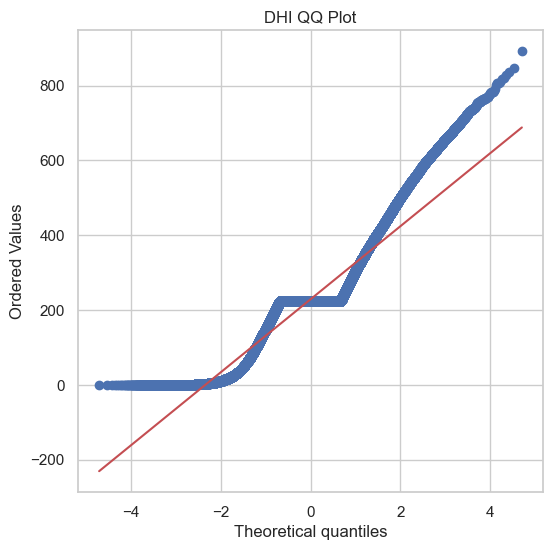

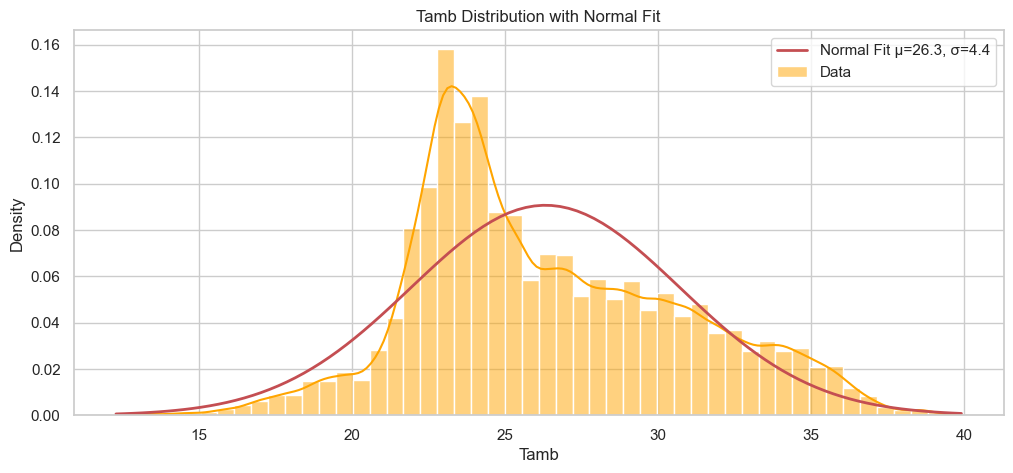

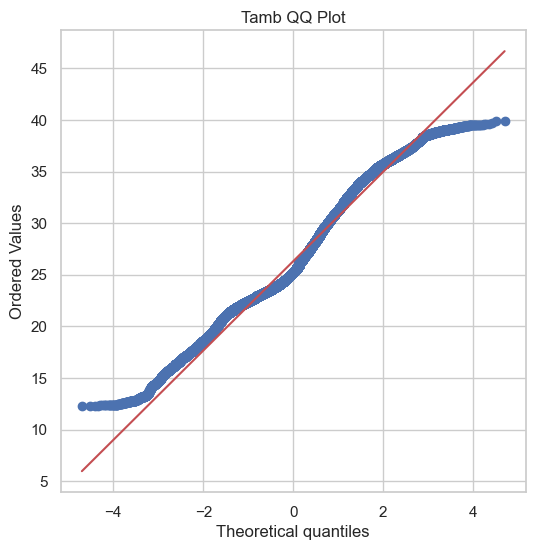

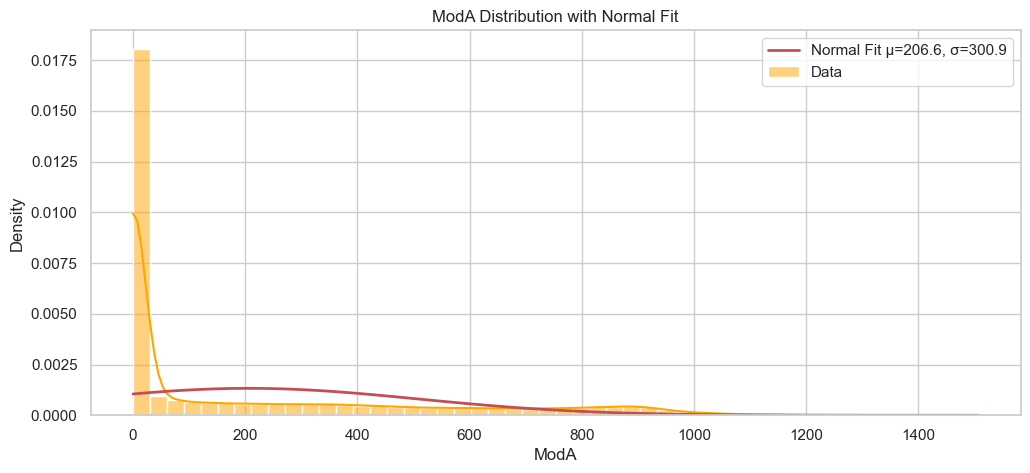

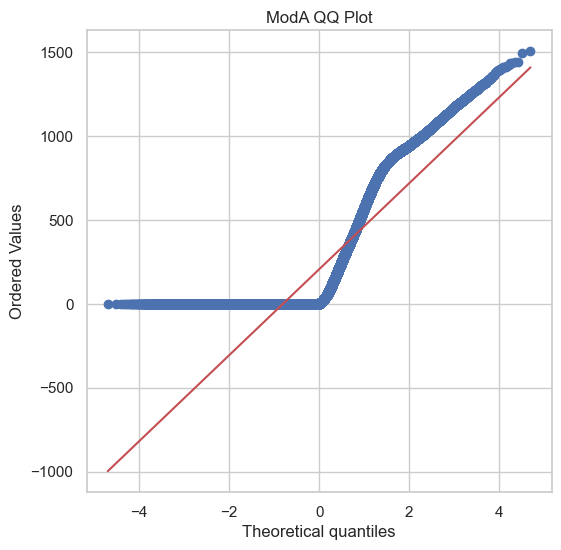

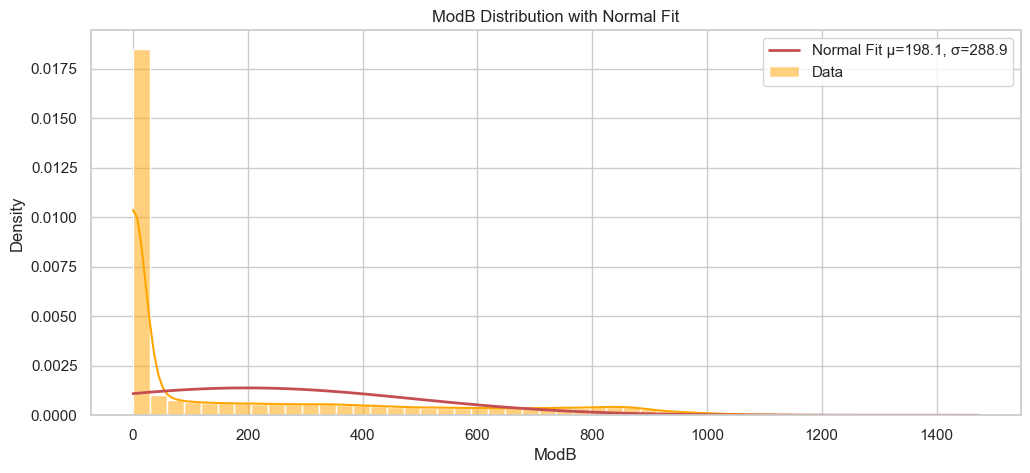

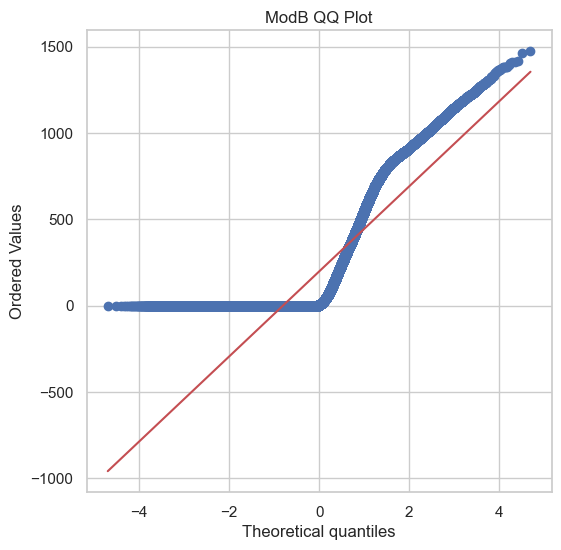

Step 14: Statistical distributions and QQ plots displayed ✅


In [24]:
import scipy.stats as st

variables = ['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB']

for var in variables:
    plt.figure(figsize=(12,5))
    sns.histplot(df[var], bins=50, kde=True, color='orange', stat='density', label='Data')
    
    # Fit normal distribution
    mu, std = st.norm.fit(df[var])
    xmin, xmax = df[var].min(), df[var].max()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', lw=2, label=f'Normal Fit μ={mu:.1f}, σ={std:.1f}')
    plt.title(f'{var} Distribution with Normal Fit')
    plt.legend()
    plt.show()
    
    # QQ plot
    plt.figure(figsize=(6,6))
    st.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'{var} QQ Plot')
    plt.show()
print("Step 14: Statistical distributions and QQ plots displayed ✅")

# -----------------------------
# Step 15: Actionable Insights
# -----------------------------

In [25]:
print("Step 15: Actionable Insights based on EDA ✅\n")

insights = [
    "1. Cleaning significantly increases module output (ModA & ModB), suggesting regular maintenance is critical.",
    "2. Peak GHI occurs around midday (Hour ~12-14), which can inform optimal energy storage scheduling.",
    "3. Wind direction (WD) has minor effect on GHI, but strong winds may influence sensor readings, check WS & WSgust correlations.",
    "4. Temperature and relative humidity show moderate correlation; panels may slightly underperform in very high RH conditions.",
    "5. Outliers in GHI and DNI were rare after cleaning, suggesting data quality is reliable for modeling."
]

for i in insights:
    print(i)

Step 15: Actionable Insights based on EDA ✅

1. Cleaning significantly increases module output (ModA & ModB), suggesting regular maintenance is critical.
2. Peak GHI occurs around midday (Hour ~12-14), which can inform optimal energy storage scheduling.
3. Wind direction (WD) has minor effect on GHI, but strong winds may influence sensor readings, check WS & WSgust correlations.
4. Temperature and relative humidity show moderate correlation; panels may slightly underperform in very high RH conditions.
5. Outliers in GHI and DNI were rare after cleaning, suggesting data quality is reliable for modeling.


# ------------------------------------------
# Step 16: References & Self-Learning
# ------------------------------------------

In [26]:
print("\nStep 16: References & Self-Learning Demonstration ✅\n")

references = [
    "1. Duffie, J.A., Beckman, W.A., Solar Engineering of Thermal Processes, 4th Edition, 2013.",
    "2. Li, D.H.W., Solar Radiation and PV Performance: An EDA Approach, Renewable Energy, 2020.",
    "3. MeteoData Sources: NASA POWER, Local Meteorological Stations",
    "4. Python EDA & Visualization References: pandas, seaborn, matplotlib documentation"
]

for ref in references:
    print(ref)


Step 16: References & Self-Learning Demonstration ✅

1. Duffie, J.A., Beckman, W.A., Solar Engineering of Thermal Processes, 4th Edition, 2013.
2. Li, D.H.W., Solar Radiation and PV Performance: An EDA Approach, Renewable Energy, 2020.
3. MeteoData Sources: NASA POWER, Local Meteorological Stations
4. Python EDA & Visualization References: pandas, seaborn, matplotlib documentation


# ---------------------------------------------------------
# Step 17: Export Cleaned Data & Summarize KPIs
# ---------------------------------------------------------

# 17a. Export Cleaned Dataset

In [27]:
# Ensure the 'data/' folder exists
import os
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

# Export to CSV
clean_file = os.path.join(output_dir, "sierraleone_clean.csv")
df.to_csv(clean_file, index=True)
print(f"Step 13a: Cleaned dataset exported successfully to {clean_file} ✅")


Step 13a: Cleaned dataset exported successfully to data\sierraleone_clean.csv ✅


# 17b. Compute Key KPIs

In [28]:
# KPIs for solar performance
kpis = {
    "GHI_mean": df['GHI'].mean(),
    "DNI_mean": df['DNI'].mean(),
    "DHI_mean": df['DHI'].mean(),
    "ModA_mean": df['ModA'].mean(),
    "ModB_mean": df['ModB'].mean(),
    "Tamb_mean": df['Tamb'].mean(),
    "RH_mean": df['RH'].mean(),
    "WS_mean": df['WS'].mean(),
    "WSgust_mean": df['WSgust'].mean()
}

print("Step 13b: Key Performance Indicators (KPIs) computed ✅")
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")


Step 13b: Key Performance Indicators (KPIs) computed ✅
GHI_mean: 383.02
DNI_mean: 174.95
DHI_mean: 228.91
ModA_mean: 206.64
ModB_mean: 198.11
Tamb_mean: 26.32
RH_mean: 79.45
WS_mean: 1.15
WSgust_mean: 1.69
